# **Diabetes Dataset final project** .. AI-Summer Training - ITI, Group 4

<center>
    <img src="https://media.istockphoto.com/id/1267723572/vector/diabetes-mellitus-word-concept-surrounded-with-line-icons-typography-lettering-design-with.jpg?s=612x612&w=0&k=20&c=L8xQwSwOw6XjDzQJ-8c2lBaAM6dSti04gq_bC9DDwQI=" alt="image description" style="width:300px; height:300px;">

</center>

Diabetes is a chronic medical condition where the body is unable to properly regulate blood glucose (sugar) levels. This can occur due to either the body not producing enough insulin (a hormone produced by the pancreas) or the body’s cells becoming resistant to the effects of insulin.

## import libraries that we needed

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from PIL import Image

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans

# for accracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score

#for neural network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout,BatchNormalization
from keras.optimizers import Adam ,RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

## reading the dataset

In [436]:
df=pd.read_csv('/content/diabetes.csv')

## data exploration

In [437]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [439]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [440]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [441]:
df.Pregnancies.value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [442]:
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [443]:
df.Glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [444]:
df.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [445]:
df.SkinThickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [446]:
df.Insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [447]:
df.BMI.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [448]:
(df['BMI']<18).sum()

11

In [449]:
df.DiabetesPedigreeFunction.unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [450]:
df.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

## data visualization

box plot to all columns to indicate the outliers

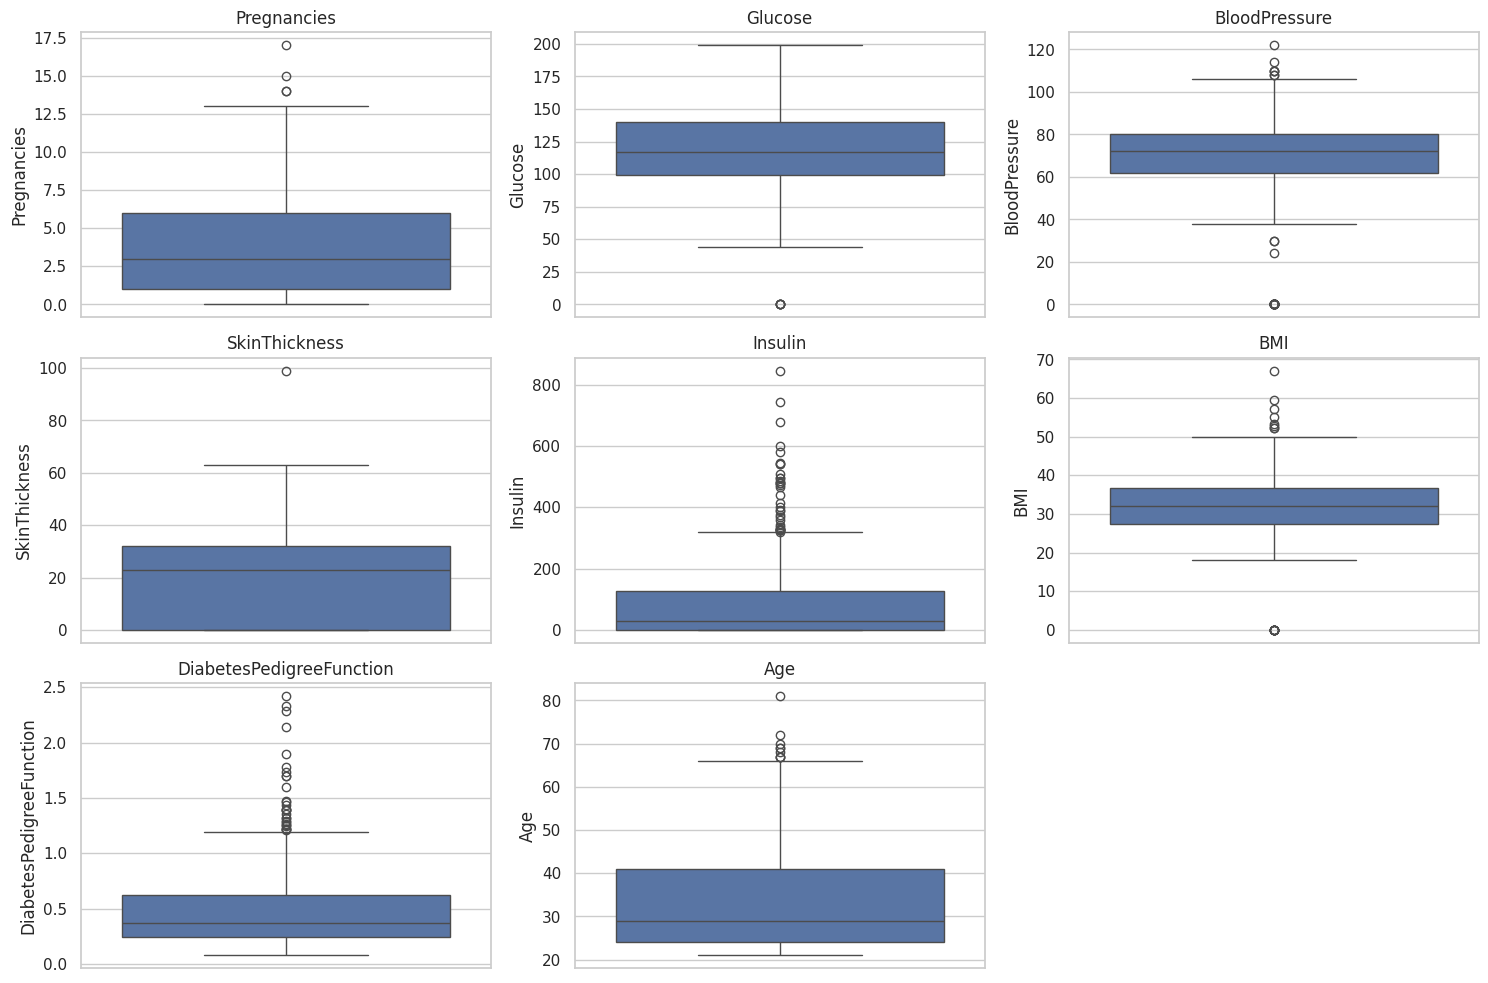

In [451]:
plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

to see the number of Diabetes and non Diabetes inthe dataset

Text(0.5, 1.0, 'count of Outcome')

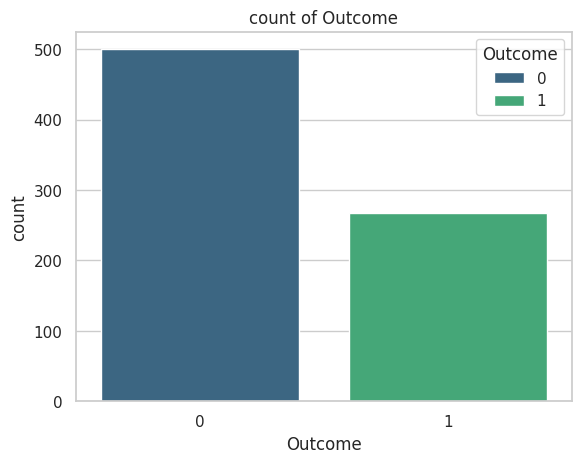

In [452]:
sns.countplot(x='Outcome',data=df,palette='viridis',hue='Outcome')
plt.title('count of Outcome')

relation between DiabetesPedigreeFunction and Outcome with histogram

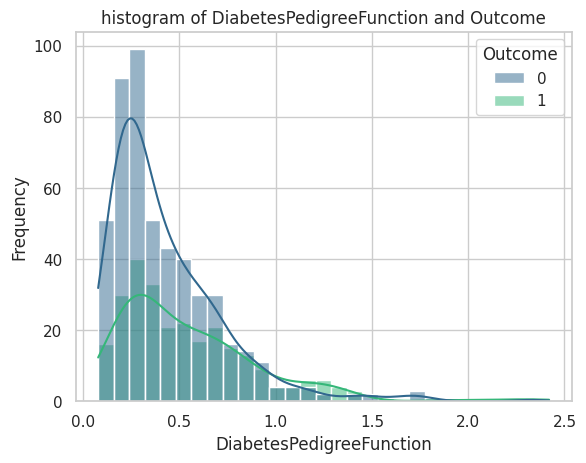

In [453]:
sns.histplot(data=df, x='DiabetesPedigreeFunction',hue='Outcome',kde=True, palette='viridis')
plt.title('histogram of DiabetesPedigreeFunction and Outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.show()

In [454]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

to indicate the relation of SkinThickness and outcome ..you can see that most of low thinkness is diabetes

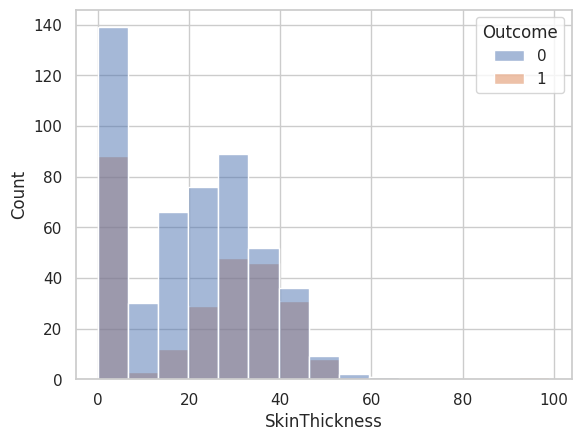

In [455]:
sns.histplot(data=df, x='SkinThickness',hue='Outcome')
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.show()

analysis of them to see statical relation between them ..by percentage of class 0 is 65.1% ..class 1 is 34.8%

In [456]:
skin_stats = df.groupby('Outcome')['SkinThickness'].describe()
print(skin_stats)

         count       mean        std  min  25%   50%   75%   max
Outcome                                                         
0        500.0  19.664000  14.889947  0.0  0.0  21.0  31.0  60.0
1        268.0  22.164179  17.679711  0.0  0.0  27.0  36.0  99.0


form the graph we can see that the most DiabetesPedigreeFunction has big of skin thikckness

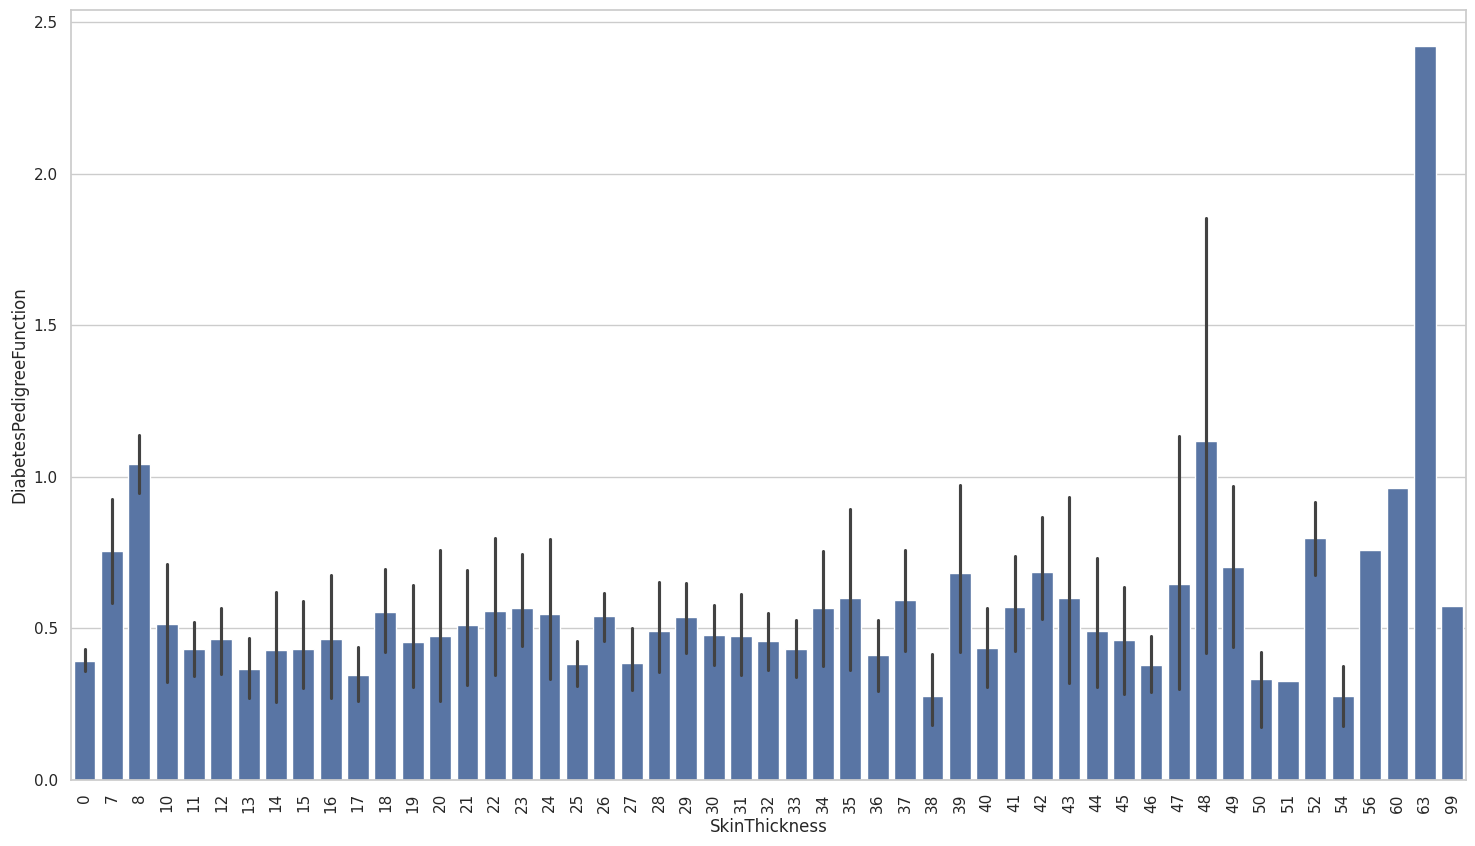

In [457]:
plt.figure(figsize=(18, 10))
sns.barplot(x=df['SkinThickness'],y=df['DiabetesPedigreeFunction'])
plt.xticks(rotation=90)
plt.show()

to show the distribution of outcome "diabetes or not " in the age.. so the young are percentap is not diabetes .. the diabetes get in the old people

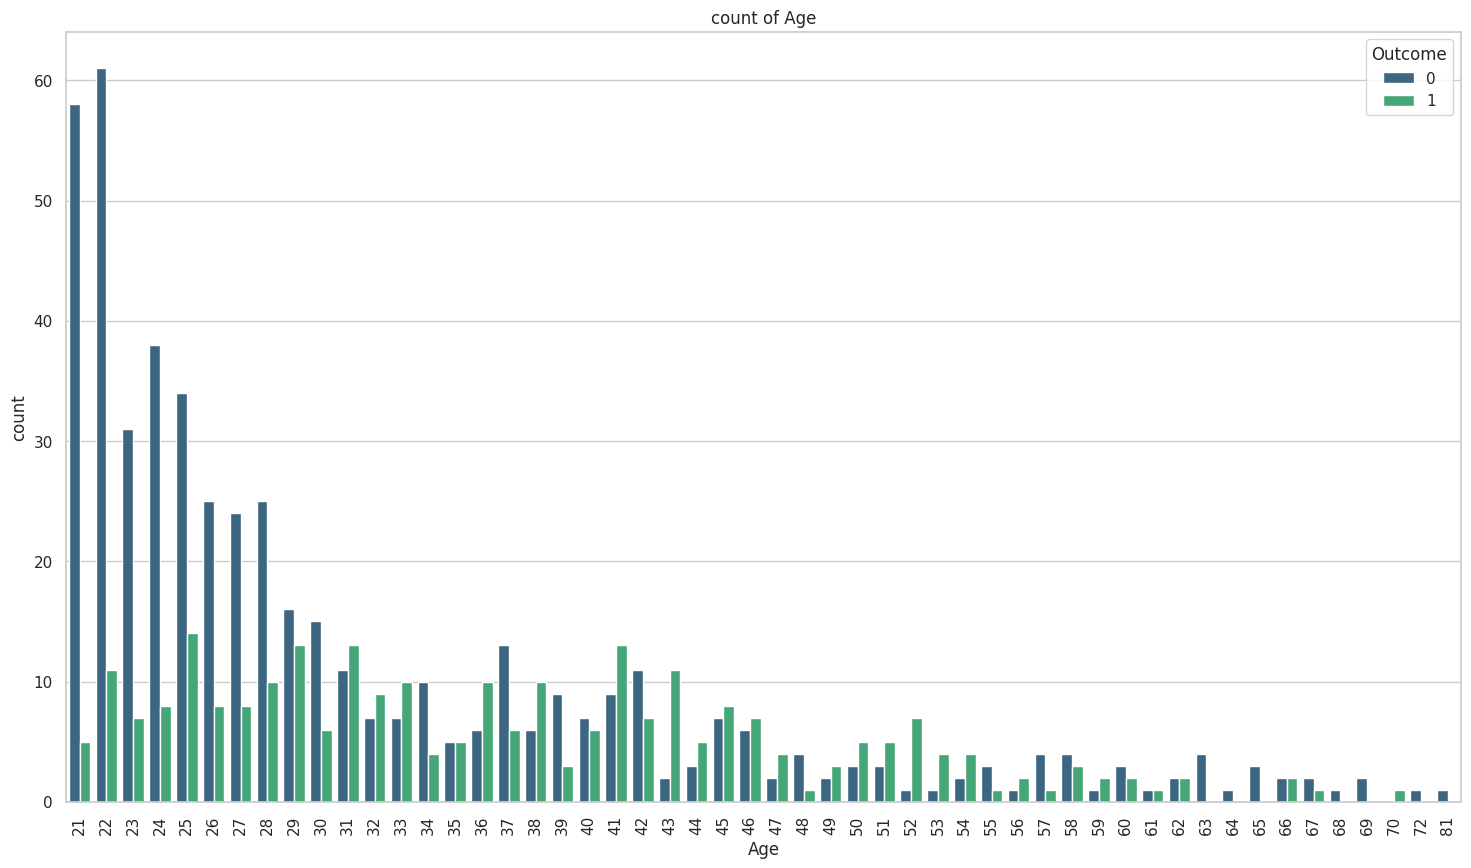

In [458]:
plt.figure(figsize=(18,10))
sns.countplot(x='Age',data=df,palette='viridis',hue='Outcome')
plt.title('count of Age')
plt.xticks(rotation=90)
plt.show()

pairplot to see in each feature its scatter plot with other feature to show interaction between variables and how these interactions might vary by outcome class "diabete or not".

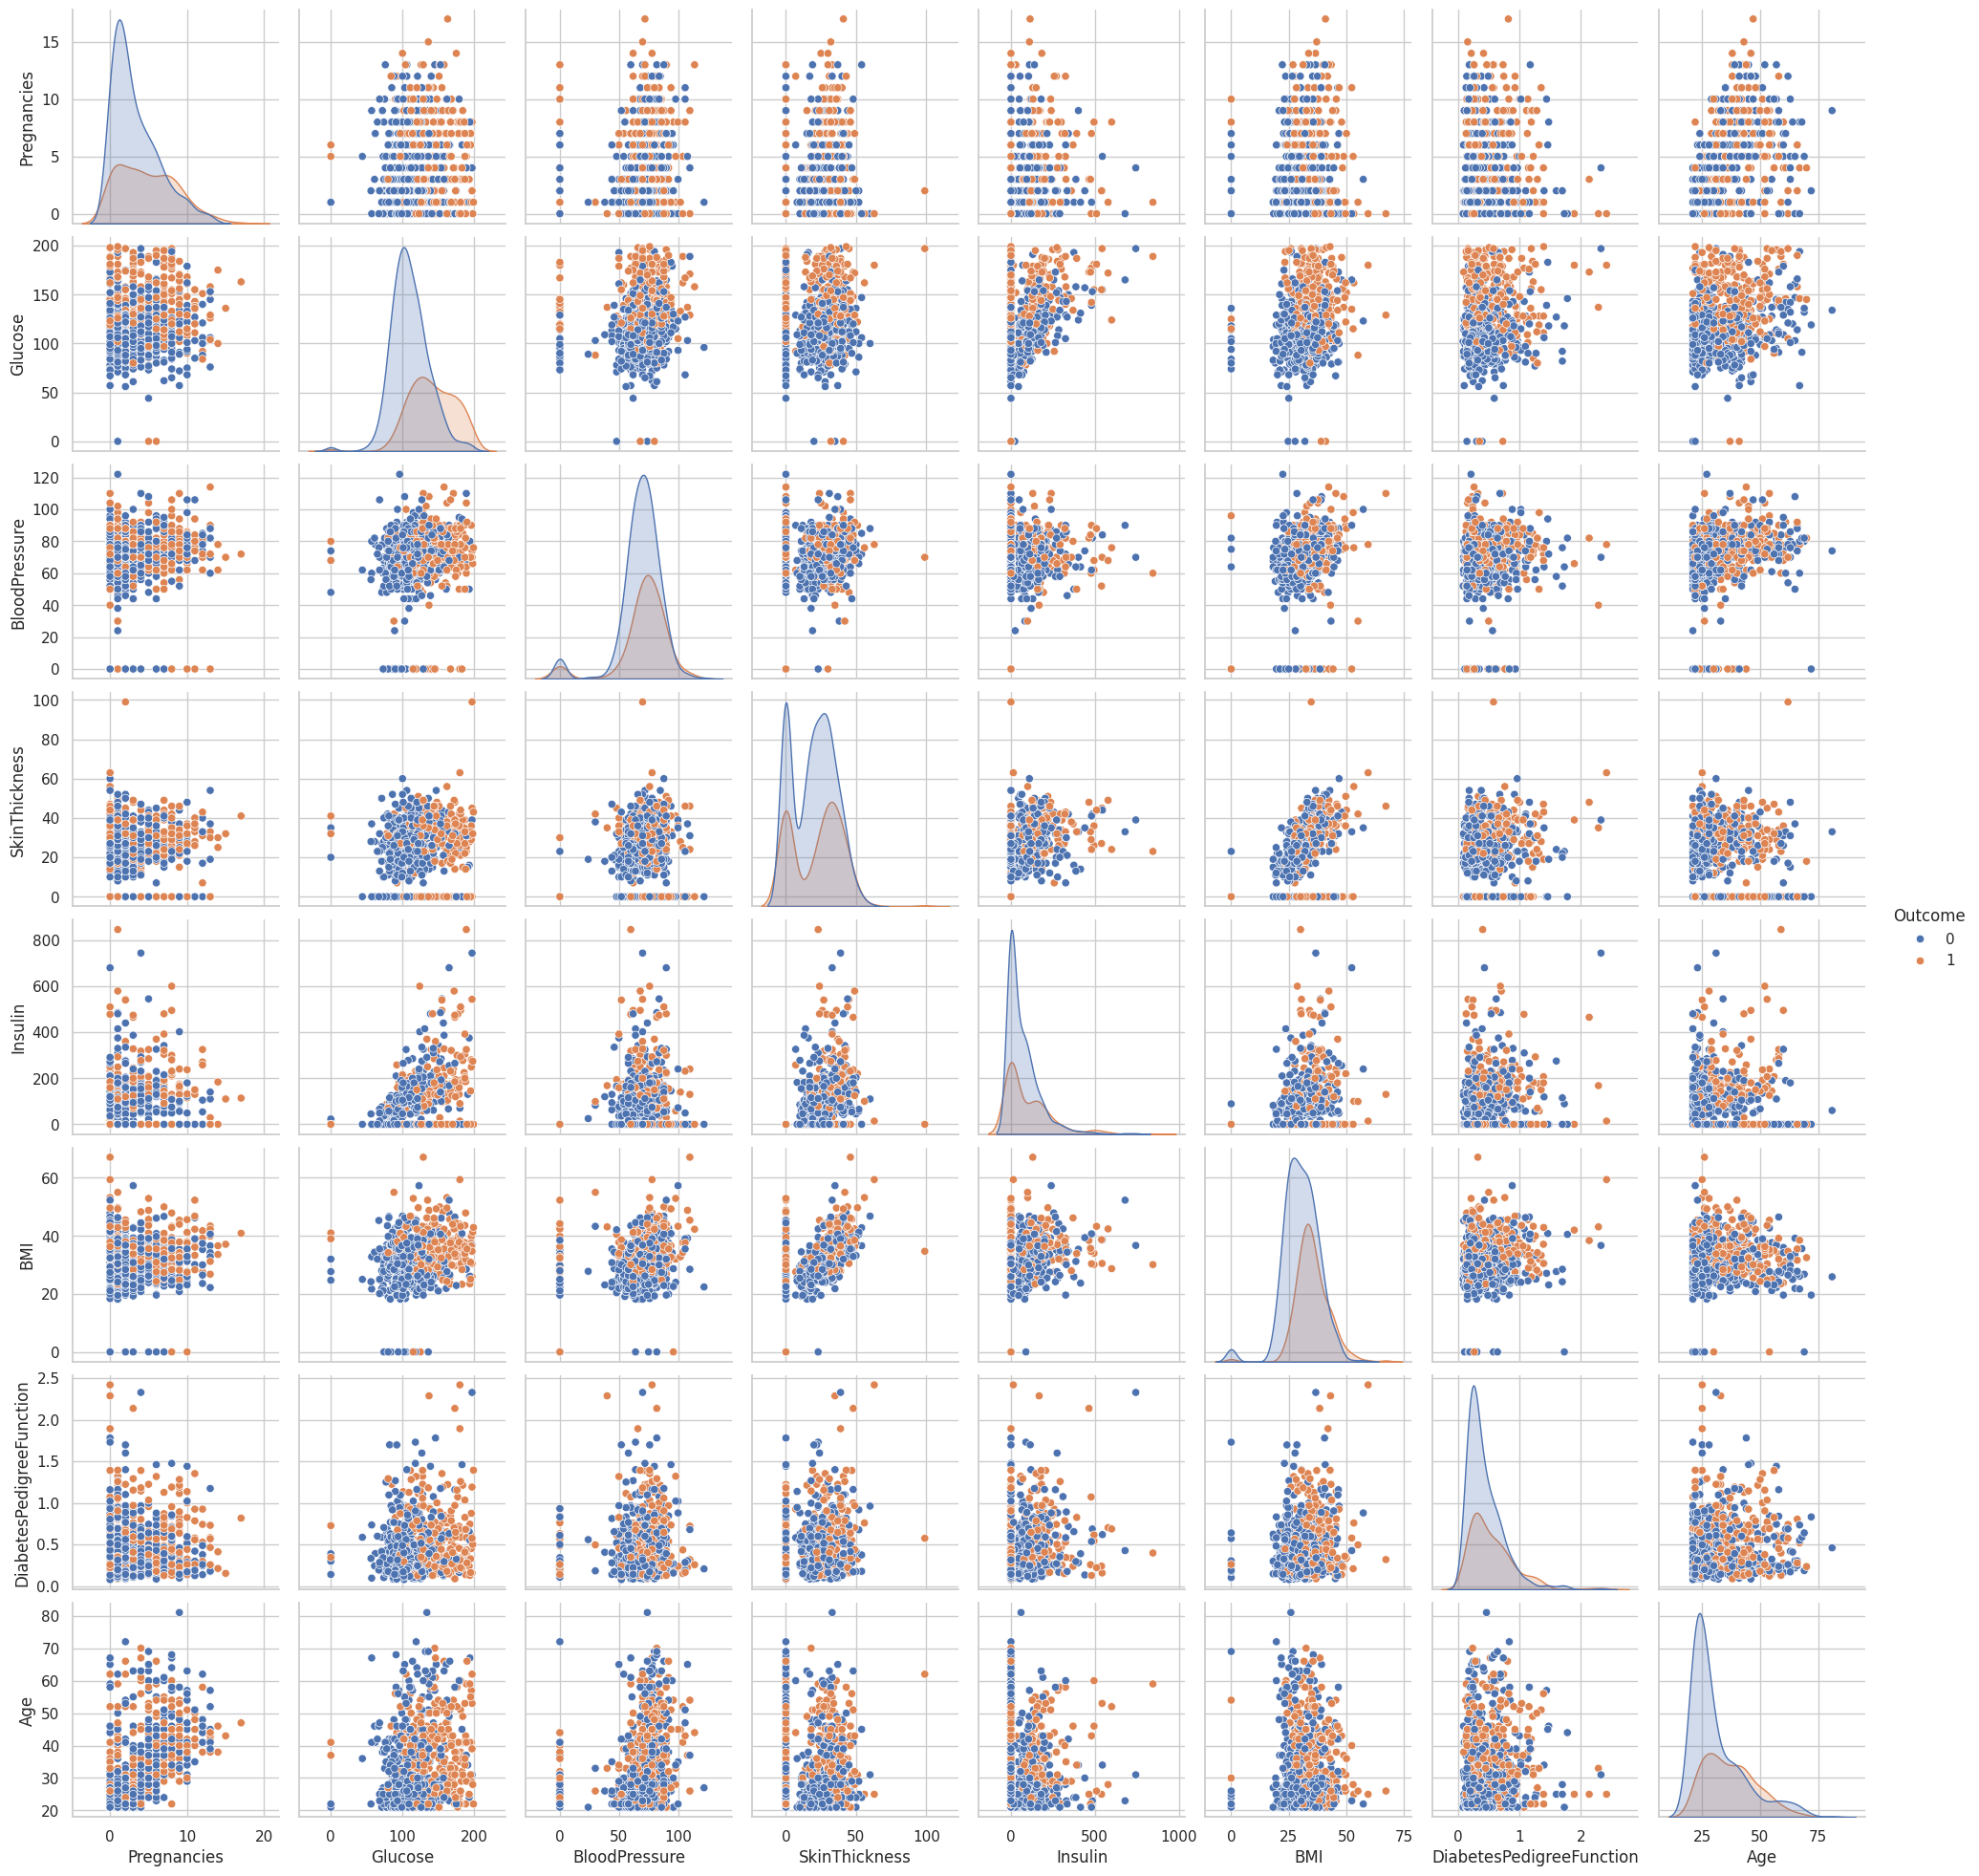

In [459]:
sns.pairplot(df,hue='Outcome')

correlation matrix to see the features and its importance in the target data

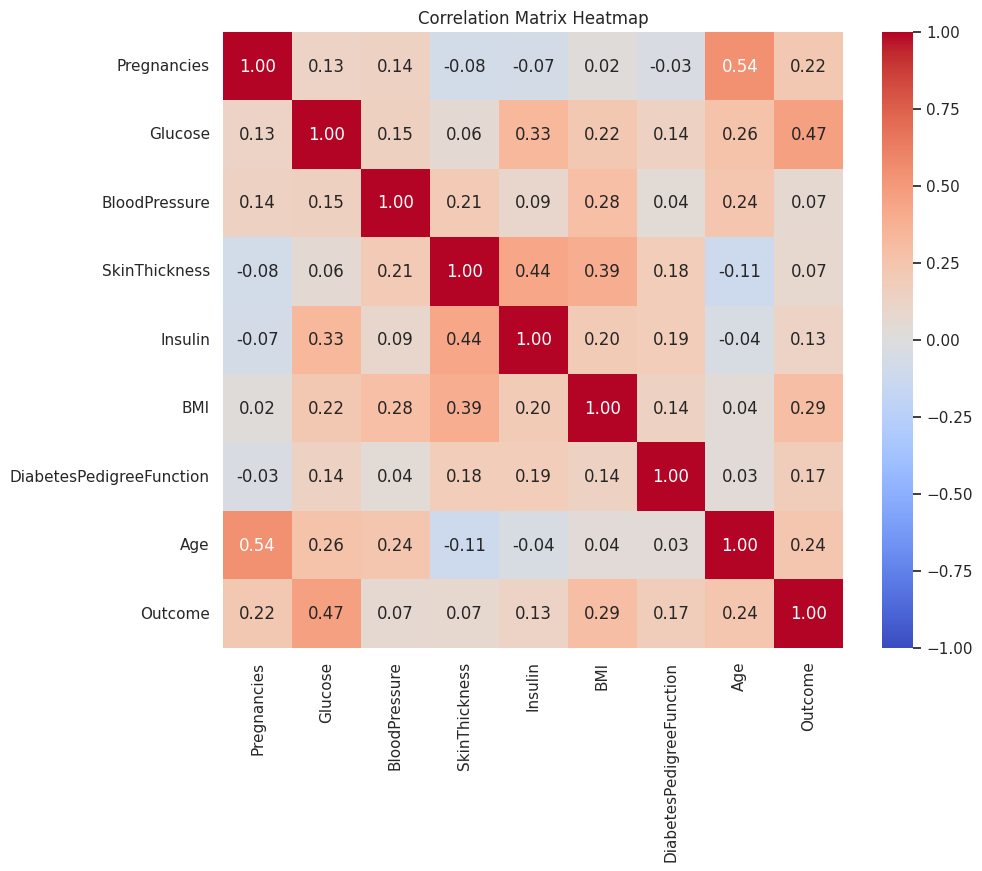

In [460]:
correlation_matrix =df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

from above we the total correlation ..we need to specify in the Outcome column to see the importance or dependent features

In [461]:
corr= df.corr()['Outcome'].drop('Outcome')
sorted_corr= corr.abs().sort_values(ascending=False)
sorted_corr

,Outcome
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


in gragh represent

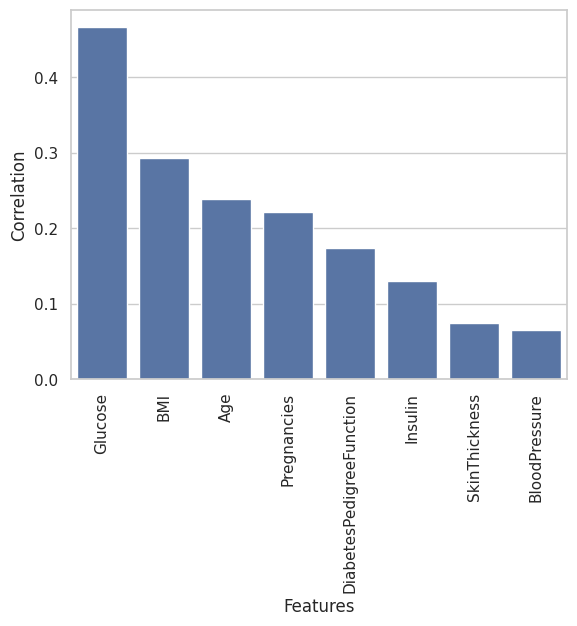

In [462]:
sns.barplot(x=sorted_corr.index,y=sorted_corr)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

again but for DiabetesPedigreeFunction column

In [463]:
corr =df.corr()['DiabetesPedigreeFunction'].drop('DiabetesPedigreeFunction')
sorted_corr= corr.abs().sort_values(ascending=False)
sorted_corr

,DiabetesPedigreeFunction
Insulin,0.185071
SkinThickness,0.183928
Outcome,0.173844
BMI,0.140647
Glucose,0.137337
BloodPressure,0.041265
Age,0.033561
Pregnancies,0.033523


in gragh representation

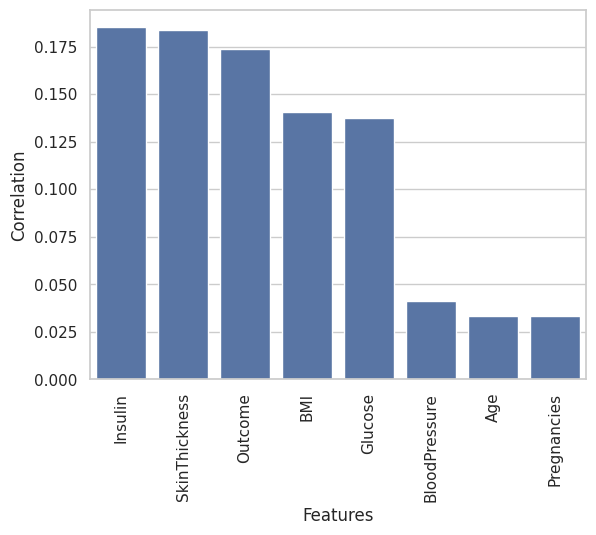

In [464]:
sns.barplot(x=sorted_corr.index, y=sorted_corr)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

## Data preprocessing

drop duplicates

In [465]:
df.duplicated().sum()

0

handle missing values

In [466]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0, np.NaN)

In [467]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


to fill the missing values with the median of data that is not null to get the correct median

In [468]:
def median_target(v):
    temp=df[df[v].notnull()]
    temp=temp[[v,'Outcome']].groupby(['Outcome'])[[v]].median().reset_index()
    return temp

In [469]:
columns =df.columns
columns =columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome']==0)&(df[i].isnull()), i]= median_target(i)[i][0]
    df.loc[(df['Outcome']==1)&(df[i].isnull()), i]= median_target(i)[i][1]

check null after handling

In [470]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


outliers handling

In [471]:
df['Insulin'].value_counts()

,count
Insulin,
102.5,236
169.5,138
105.0,11
130.0,9
140.0,9
...,...
73.0,1
171.0,1
255.0,1


In [472]:
(df['Insulin']==0).sum()

0

<Axes: ylabel='Insulin'>

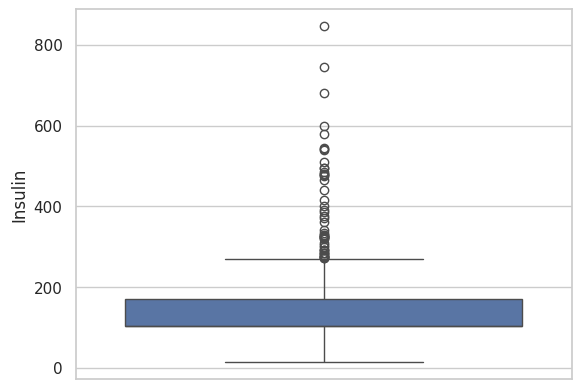

In [473]:
sns.boxplot(y=df['Insulin'])

In [474]:
df['DiabetesPedigreeFunction'].value_counts()

,count
DiabetesPedigreeFunction,
0.258,6
0.254,6
0.268,5
0.207,5
0.261,5
...,...
1.353,1
0.655,1
0.092,1


<Axes: ylabel='DiabetesPedigreeFunction'>

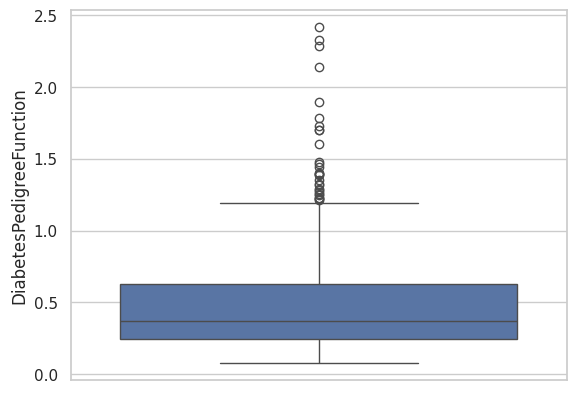

In [475]:
sns.boxplot(y=df['DiabetesPedigreeFunction'])

In [476]:
def handle_outliers(df):
    for column in df.columns:
          Q1=df[column].quantile(0.25)
          Q3=df[column].quantile(0.75)
          IQR=Q3-Q1
          lower=Q1-1.5*IQR
          upper=Q3 + 1.5 *IQR
          df=df[(df[column]>= lower)&(df[column] <= upper)]
    return df
df_cleaned =handle_outliers(df)

after handling outliers with IQR

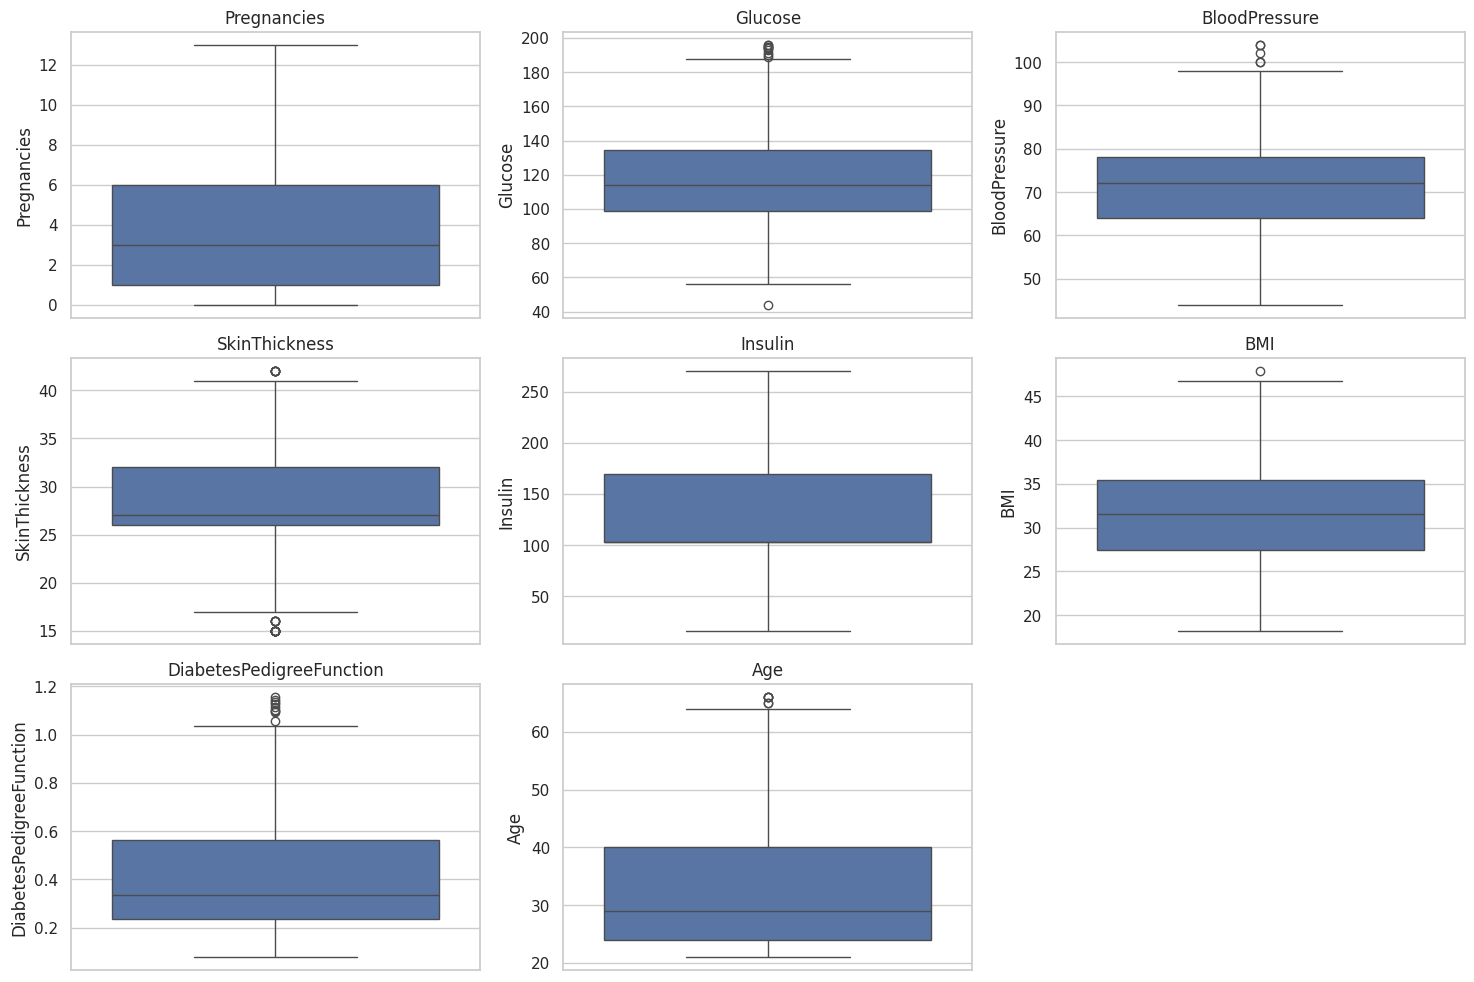

In [477]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cleaned.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [478]:
df=df_cleaned

## lets start traininng & test machine learning model and Deep learning :)

## Regression model for DiabetesPedigreeFunction column

### split the data

input (x), output or target (y)

In [479]:
x=df.drop('DiabetesPedigreeFunction',axis=1)
y=df['DiabetesPedigreeFunction']

train and test

In [480]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [481]:
scaler =StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### linear model

In [482]:
poly= PolynomialFeatures(degree=1, include_bias=True)
x_train_poly =poly.fit_transform(x_train)
x_test_poly =poly.transform(x_test)

In [483]:
linear_model=LinearRegression()
lasso_model=Lasso(alpha=.008)

In [484]:
ridge_model=Ridge(alpha=.001)

In [485]:
pca =PCA(n_components=0.98)
X_train_pca =pca.fit_transform(x_train_poly)
X_test_pca =pca.transform(x_test_poly)

In [486]:
lasso_model.fit(X_train_pca, y_train)

Lasso(alpha=0.008)

In [487]:
linear_model.fit(X_train_pca, y_train)
ridge_model.fit(X_train_pca, y_train)

Ridge(alpha=0.001)

In [488]:
y_pred_lasso =lasso_model.predict(X_test_pca)
r2_lasso=r2_score(y_test, y_pred_lasso)

In [489]:
y_pred_linear =linear_model.predict(X_test_pca)
y_pred_ridge =ridge_model.predict(X_test_pca)
r2_lin=r2_score(y_test, y_pred_linear)
r2_ridge=r2_score(y_test, y_pred_ridge)

In [490]:
print("mse linear: ",mean_squared_error(y_test,y_pred_linear))
print("mse lasso: ",mean_squared_error(y_test,y_pred_lasso))
print("mse ridge: ",mean_squared_error(y_test,y_pred_ridge))
print('r2_lin: ',r2_lin)
print('r2_lasso: ',r2_lasso)
print('r2_ridge: ',r2_ridge)

mse linear:  0.05715734138625662
mse lasso:  0.05630929649941839
mse ridge:  0.0571573334284448
r2_lin:  0.012637926794138332
r2_lasso:  0.02728744227775315
r2_ridge:  0.012638064261021653


### SGDRegressor

In [552]:
sgd_reg = SGDRegressor()
param_grid ={
    'penalty': ['l2', 'l1'],
    'alpha': [ 0.001, 0.01, 0.1],
    'learning_rate': ['constant','optimal','invscaling'],
    'eta0': [0.01, 0.1, 1],
    'max_iter': [1000,2000,3000]
    }

In [554]:
grid_search =GridSearchCV(sgd_reg, param_grid, cv=5, error_score='raise' )
grid_search.fit(x_train, y_train)
best_sgd =grid_search.best_estimator_
y_pred_sgd =best_sgd.predict(x_test)

In [555]:
sgd_mse =mean_squared_error(y_test,y_pred_sgd)
sgd_r2 =r2_score(y_test,y_pred_sgd)
print("Best paramters: ",grid_search.best_params_)
print("Mean Squared Error: ",sgd_mse)
print("R-squared: ",sgd_r2)

Best paramters:  {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l2'}
Mean Squared Error:  0.1397701550448161
R-squared:  0.3626536800771195


### result of regression model training

In [556]:
results = pd.DataFrame({
    'Model':['Linear Regression','lasso','rige','sgd'],
    'R_squ':[r2_lin, r2_lasso,r2_ridge, sgd_r2]
})

In [557]:
results.sort_values(by='R_squ',ascending=False)

,Model,R_squ
3,sgd,0.362654
1,lasso,0.027287
2,rige,0.012638
0,Linear Regression,0.012638


so we can say that sgd is the best for regression

## Classification model for Outcome

In [558]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [559]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### KNeighborsClassifier model

In [560]:
param_grid = {
    'kneighborsclassifier__n_neighbors':[3,5,7,9,11],
    'kneighborsclassifier__weights':['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

In [561]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy')

In [562]:
grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [563]:
grid_search.best_score_

0.886021505376344

In [564]:
grid_search.score(x_test,y_test)
y_pred=grid_search.best_estimator_.predict(x_test)

In [565]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        79
           1       0.83      0.79      0.81        38

    accuracy                           0.88       117
   macro avg       0.87      0.86      0.86       117
weighted avg       0.88      0.88      0.88       117



In [566]:
best_model =grid_search.best_estimator_
knn_accuracy =best_model.score(x_test, y_test)
print(f'Accuracy: {knn_accuracy}')

Accuracy: 0.8803418803418803


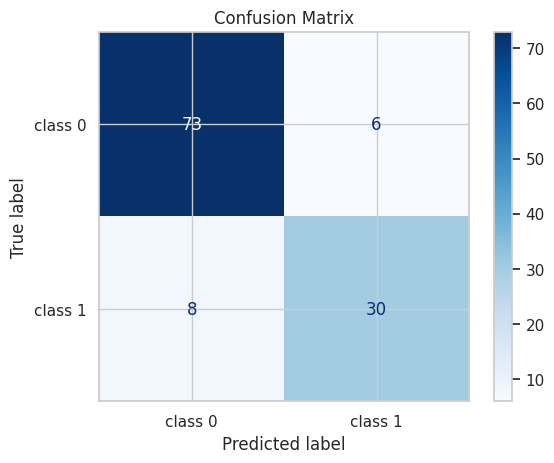

In [567]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 0','class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### LogisticRegression model

In [568]:
param_grid = {
    'logisticregression__C':[0.001,0.01,0.1,1,10,100,1000],
    'logisticregression__penalty':['l1','l2'],
    'logisticregression__solver':['liblinear','saga'],
    'logisticregression__max_iter':[100, 200,300]
}

In [569]:
pipeline =make_pipeline(StandardScaler(),LogisticRegression())

In [570]:
grid_search =GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [571]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__max_iter': [100, 200, 300],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [572]:
grid_search.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [573]:
grid_search.best_score_

0.886021505376344

In [574]:
best_model =grid_search.best_estimator_
log_accuracy =best_model.score(x_test, y_test)
print("Test Accuracy: ",log_accuracy)

Test Accuracy:  0.8632478632478633


### SVM model

In [575]:
svm=SVC(kernel='linear',C=100)
svm.fit(x_train,y_train)

SVC(C=100, kernel='linear')

In [576]:
y_pred= svm.predict(x_test)

In [577]:
svm_accuracy =accuracy_score(y_test, y_pred)
print(svm_accuracy)

0.8632478632478633


### result of classification models

In [578]:
result=pd.DataFrame({
    'Model':['KNeighborsClassifier','LogisticRegression','SVM'],
    'Accuracy':[knn_accuracy,log_accuracy,svm_accuracy]
})

In [579]:
result.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
0,KNeighborsClassifier,0.880342
1,LogisticRegression,0.863248
2,SVM,0.863248


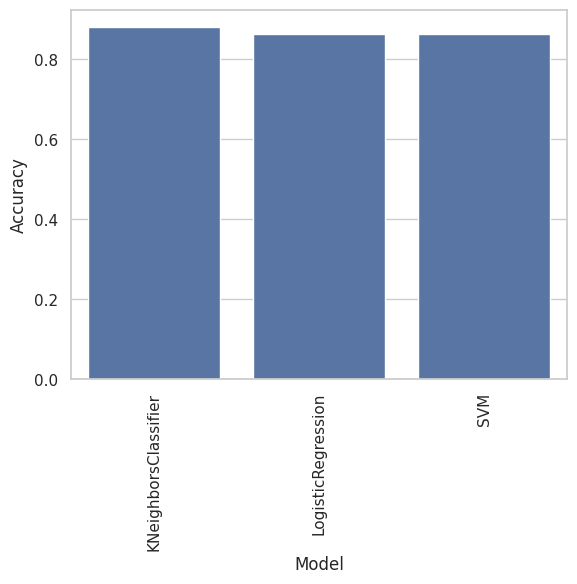

In [580]:
sns.barplot(x='Model',y='Accuracy',data=result)
plt.xticks(rotation=90)
plt.show()

So the best model is KNN with acuuracy 88%

## unsupervised with Kmeans model

In [581]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [582]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [583]:
y_km = kmeans.predict(x)

In [584]:
conf_matrix =confusion_matrix(y,y_km)
km_accuracy =accuracy_score(y,y_km)
print("Accuracy: ",km_accuracy)

Accuracy:  0.8797250859106529


In [585]:
cm=confusion_matrix(y,y_km)
print(cm)
print(classification_report(y,y_km))

[[346  50]
 [ 20 166]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       396
           1       0.77      0.89      0.83       186

    accuracy                           0.88       582
   macro avg       0.86      0.88      0.87       582
weighted avg       0.89      0.88      0.88       582



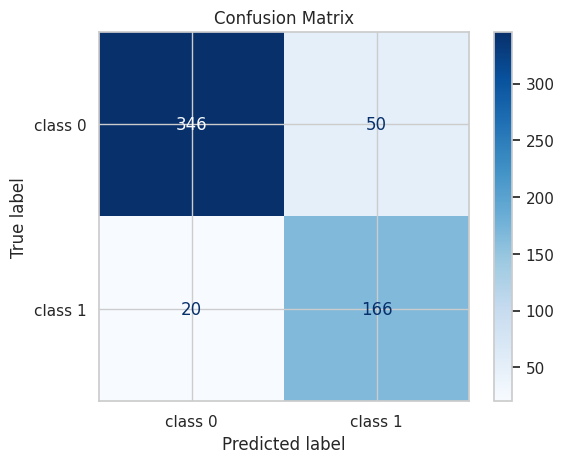

In [586]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['class 0','class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Deep learning model neural network

In [587]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [588]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [589]:
scaler =StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

In [590]:
x_train.shape

(465, 8)

In [591]:
y_train.shape

(465,)

In [592]:
x_test.shape

(117, 8)

In [593]:
y_test.shape

(117,)

### Neutral Network with Adam optimizer

In [594]:
batch_size=32
epochs=50
hidden_size=64
dropout_rate=.5
learning_rate=.001
l2_regul =.01

In [595]:
early_stopping =EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

In [596]:
lr_scheduler =ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

In [597]:
model =Sequential([
    Dense(64, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=l2(l2_regul)),
    BatchNormalization(),
    Dropout(dropout_rate),
    Dense(32, activation='relu', kernel_regularizer=l2(l2_regul)),
    BatchNormalization(),
    Dropout(dropout_rate),
    Dense(16, activation='relu', kernel_regularizer=l2(l2_regul)),
    BatchNormalization(),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [598]:
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_78               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_79               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_80               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 224 (896.00 B)

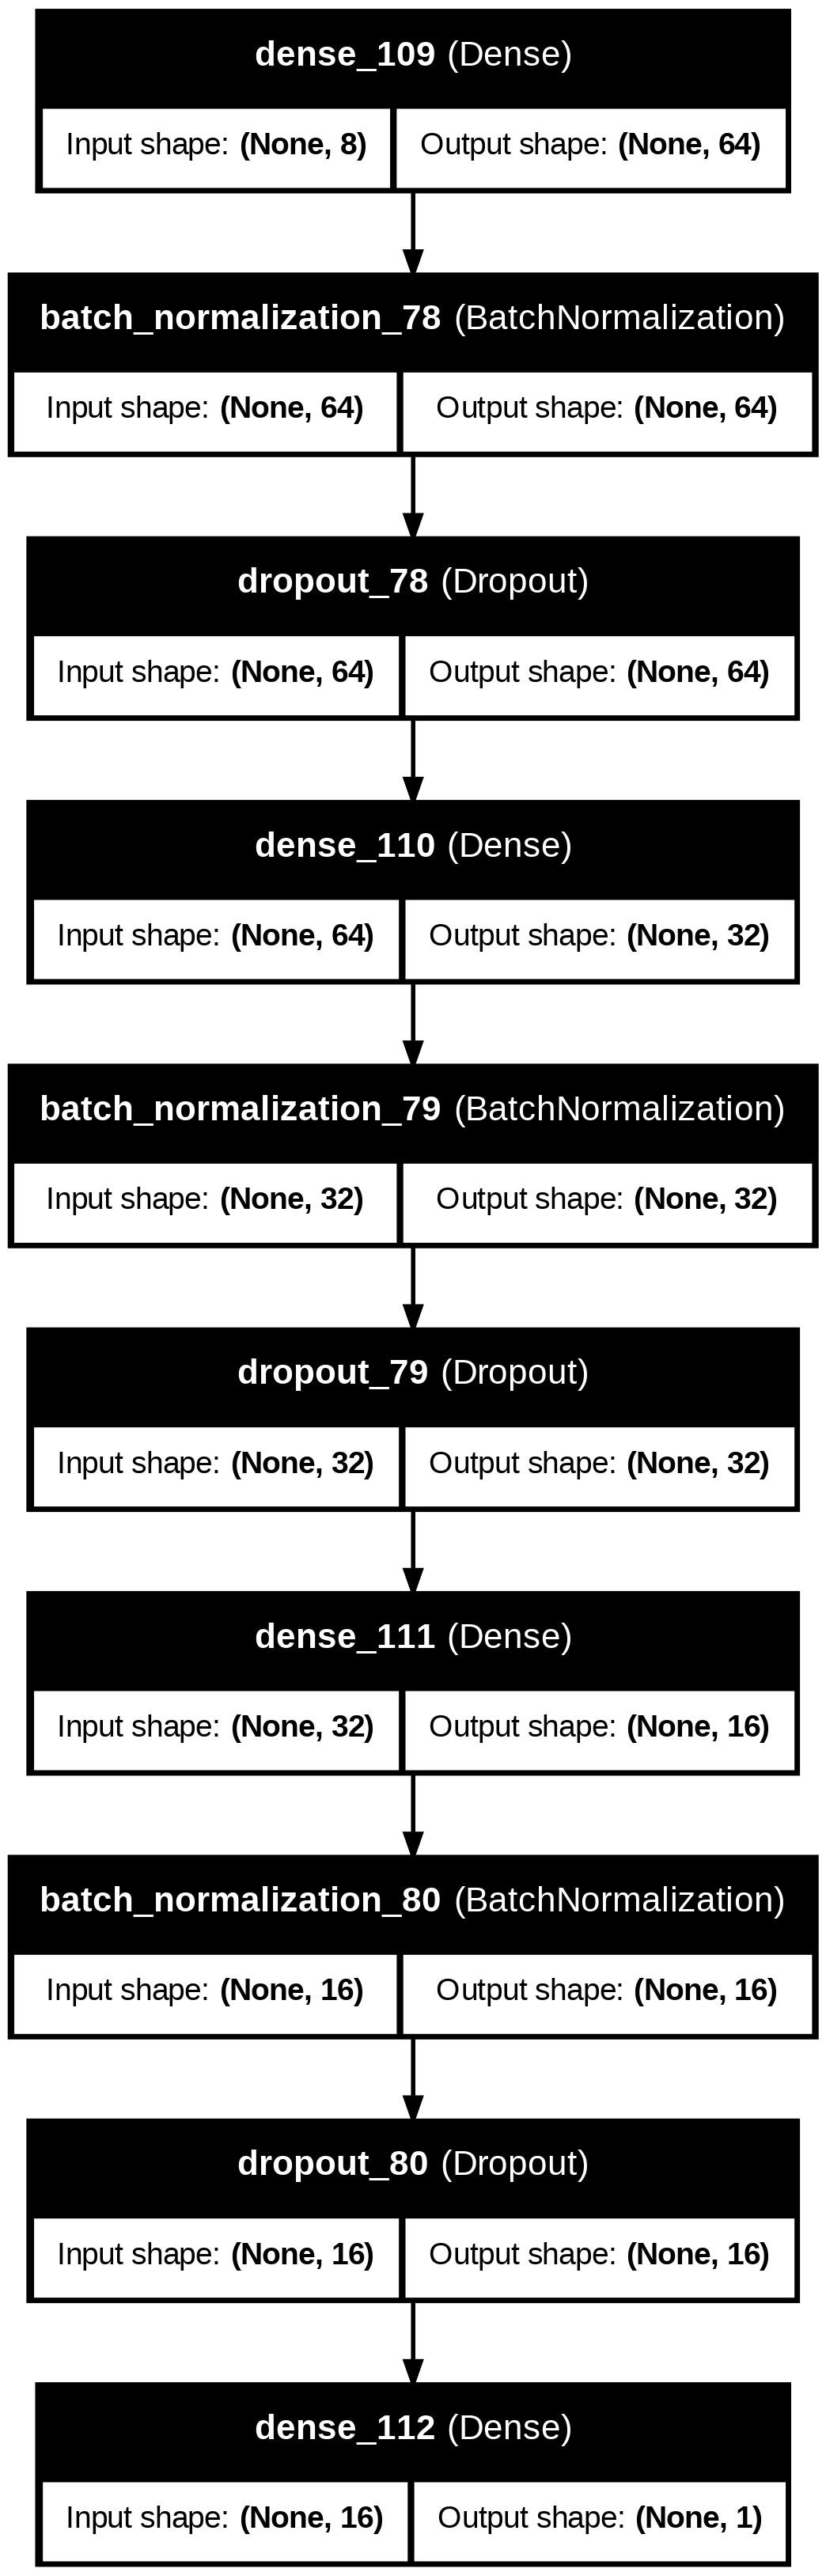

In [599]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [600]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

In [601]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),
                      epochs=50,
                       batch_size=batch_size,
                      callbacks=[lr_scheduler],
                      )

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5761 - loss: 1.6981 - val_accuracy: 0.6410 - val_loss: 1.4436 - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6588 - loss: 1.5870 - val_accuracy: 0.7009 - val_loss: 1.3863 - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6461 - loss: 1.5352 - val_accuracy: 0.6923 - val_loss: 1.3441 - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6827 - loss: 1.4151 - val_accuracy: 0.6923 - val_loss: 1.3048 - learning_rate: 0.0010
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6647 - loss: 1.4532 - val_accuracy: 0.6838 - val_loss: 1.2717 - learning_rate: 0.0010
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6623 - loss: 1.4212 - val_accuracy: 0.6838 - val_loss: 1.2415 - learning_rate: 0.0010
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6856 - loss: 1.4866 - val_accuracy:

In [602]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

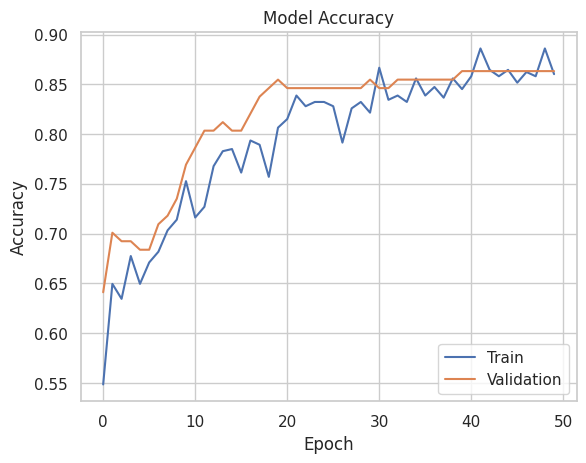

In [603]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
plt.savefig('model_accuracy.png', dpi=300)
img = Image.open('model_accuracy.png')
img.save('model_accuracy_final.png')
plt.close()

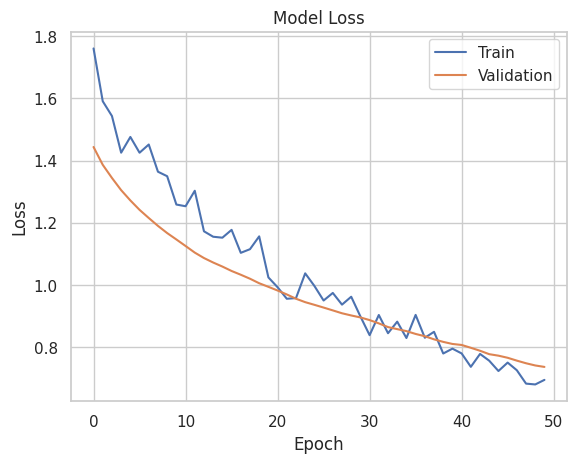

In [604]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
plt.savefig('model_loss.png', dpi=300)
img = Image.open('model_loss.png')
img.save('model_loss_final.png')
plt.close()

### neural network with optimizer RMSprop

In [617]:
model = Sequential([
    Dense(64, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=l2(l2_regul)),
    BatchNormalization(),
    Dropout(dropout_rate),
    Dense(32, activation='relu', kernel_regularizer=l2(l2_regul)),
    BatchNormalization(),
    Dropout(dropout_rate),
    Dense(16, activation='relu', kernel_regularizer=l2(l2_regul)),
    BatchNormalization(),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')
])

In [618]:
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [619]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),
                      epochs=50,
                      callbacks=[lr_scheduler],
                      )

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4720 - loss: 1.8276 - val_accuracy: 0.5128 - val_loss: 1.4522 - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5161 - loss: 1.7158 - val_accuracy: 0.5897 - val_loss: 1.4239 - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5429 - loss: 1.6139 - val_accuracy: 0.6325 - val_loss: 1.3999 - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5848 - loss: 1.4568 - val_accuracy: 0.7179 - val_loss: 1.3753 - learning_rate: 0.0010
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6112 - loss: 1.4347 - val_accuracy: 0.7350 - val_loss: 1.3488 - learning_rate: 0.0010
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6470 - loss: 1.3658 - val_accuracy: 0.7692 - val_loss: 1.3188 - learning_rate: 0.0010
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6660 - loss: 1.3310 - val_accuracy:

In [620]:
train_loss, train_accuracy= model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy= model.evaluate(x_test, y_test, verbose=0)

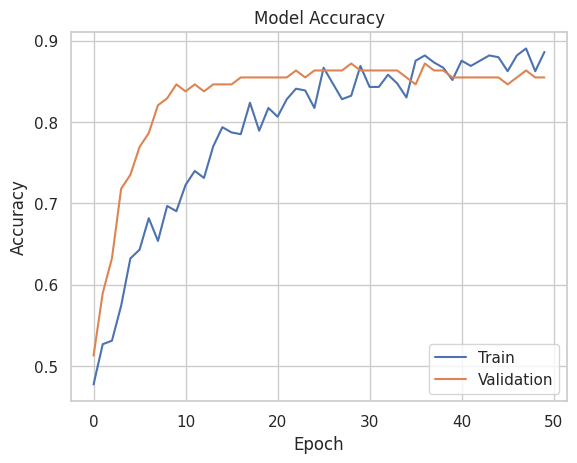

In [621]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()
plt.savefig('model_accuracy2.png', dpi=300)
img = Image.open('model_accuracy2.png')
img.save('model_accuracy_final2.png')
plt.close()

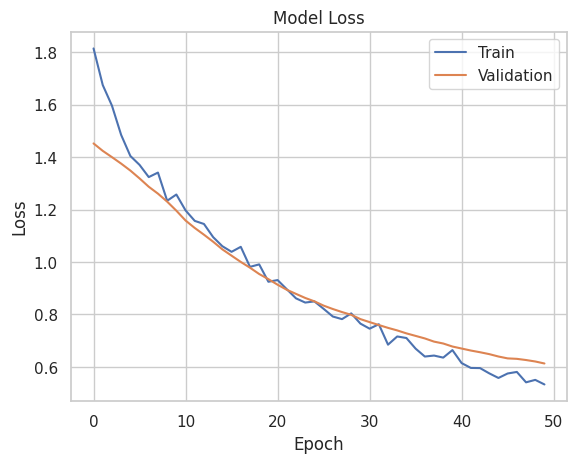

In [622]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
plt.savefig('model_loss2.png', dpi=300)
img = Image.open('model_loss2.png')
img.save('model_loss_final2.png')
plt.close()